# MATH 210 Introduction to Mathematical Computing

## April 5, 2023

* Eigenvalues and eigenvectors
* `scipy.linalg.eig`
* Power method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

## Eigenvalues and Eigenvectors

Let $A$ be a $n \times n$ matrix. A value $\lambda$ is an **eigenvalue** for $A$ if there exists a nonzero vector $\mathbf{v} \in \mathbb{R}^n$ such that

$$
A \mathbf{v} = \lambda \mathbf{v} \ \ , \ \ \mathbf{v} \ne 0
$$

The vector $\mathbf{v}$ is called an **eigenvector** for $A$ with eigenvalue $\lambda$.

How do we compute eigenvalues and eigenvectors?

Compute the characteristic polynomial

$$
p_A(x) = \mathrm{det}(A - xI)
$$

and solve for the roots $p_A(x) = 0$ to find eigenvalues. Then plug each eigenvalue $\lambda$ into $(A - \lambda I)\mathbf{v} = 0$ and solve to find corresponding eigenvector $\mathbf{v}$.

If $A$ is $2 \times 2$ then $p_A(x) = x^2 - (a+d)x + (ad - bc)$ where

$$
A = \begin{bmatrix} a & b \\ c & d \end{bmatrix}
$$

For example, let's compute the eigenvalues of

$$
A = \begin{bmatrix} 1 & -2 \\ -2 & 1 \end{bmatrix}
$$

Compute $p_A(x) = x^2 - 2x - 3 = (x - 3)(x + 1)$ therefore $\lambda_0 = 3$ and $\lambda_1 = -1$.

Compute $\mathbf{v}_0$ for $\lambda_0$:

$$
\begin{bmatrix} -2 & -2 \\ -2 & -2 \end{bmatrix} \mathbf{v}_0 =
\begin{bmatrix} 0 \\ 0 \end{bmatrix}
$$

$$
\mathbf{v}_0 = \begin{bmatrix} 1 \\ -1 \end{bmatrix}
$$

Compute $\mathbf{v}_1$ for $\lambda_1$:

$$
\begin{bmatrix} 2 & -2 \\ -2 & 2 \end{bmatrix} \mathbf{v}_1 =
\begin{bmatrix} 0 \\ 0 \end{bmatrix}
$$

$$
\mathbf{v}_1 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}
$$

## `scipy.linalg.eig`

In [2]:
A = np.array([[1,-2],[-2,1]])
A

array([[ 1, -2],
       [-2,  1]])

In [3]:
result = la.eig(A)
result

(array([ 3.+0.j, -1.+0.j]),
 array([[ 0.70710678,  0.70710678],
        [-0.70710678,  0.70710678]]))

In [4]:
type(result)

tuple

The function `la.eig` returns a tuple of length 2 where the first entry is a 1D NumPy array of complex eigenvalues and the second entry is a 2D NumPy array of corresponding unit eigenvectors.

In [5]:
result = la.eig(A)
D = result[0]
V = result[1]

In [6]:
D

array([ 3.+0.j, -1.+0.j])

In [7]:
V

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

Note that we can unpack the values `D` and `V` directly.

In [8]:
D,V = la.eig(A)

In [9]:
D = np.real(D)
D

array([ 3., -1.])

In [10]:
V

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

Verify using the definition $A \mathbf{v} = \lambda \mathbf{v} \Rightarrow A \mathbf{v} - \lambda \mathbf{v} = 0$.

In [11]:
A@V[:,0] - D[0]*V[:,0]

array([-4.4408921e-16,  0.0000000e+00])

In [12]:
A@V[:,1] - D[1]*V[:,1]

array([-7.77156117e-16,  1.11022302e-16])

Now let's do a huge example.

In [13]:
N = 500
A = -2*np.eye(N) + np.diag(np.ones(N-1),1) + np.diag(np.ones(N-1),-1)
A

array([[-2.,  1.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1., -2.]])

In [14]:
D,V = la.eig(A)
D = np.sort(np.real(D))

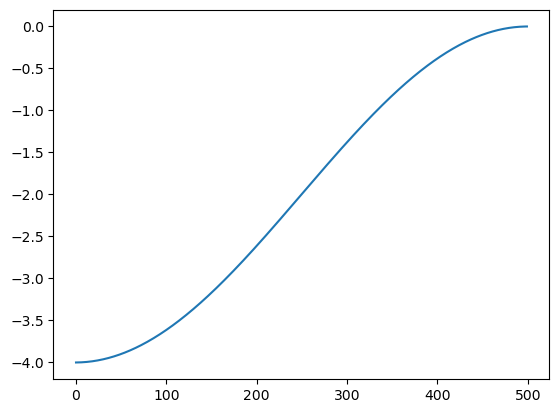

In [15]:
plt.plot(D)
plt.show()

This matrix is called a toeplitz matrix and the eigenvalues follow a beautiful pattern.

## Power Method

In [16]:
A = np.array([[1,-2],[-2,1]])

In [17]:
x0 = np.array([1,0])

In [21]:
Anx0 = x0
for n in range(0,10):
    Anx0 = A@Anx0
    Anx0 = Anx0/np.max(np.abs(Anx0))
print(Anx0)

[ 1.         -0.99996613]


If we have an approximation $\mathbf{v}$ of an eigenvector, how do we approximate the eigenvalue?

$$
A\mathbf{v} = \lambda \mathbf{v}
$$

$$
\mathbf{v}^T A \mathbf{v} = \lambda \mathbf{v}^T \mathbf{v}
$$

$$
\frac{\mathbf{v}^T A \mathbf{v}}{\mathbf{v}^T \mathbf{v}} = \lambda 
$$

In [22]:
Anx0.T @ A @ Anx0 / (Anx0.T @ Anx0)

2.9999999988528114

This is called the Rayleigh quotient.